<a href="https://colab.research.google.com/github/bayashi-cl/statistical-learning/blob/main/lab/02_StatisticalLearning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.3.1 基本コマンド

### 関数・代入

`c` 関数でベクトルを作り、それを変数 `x` に代入する。

In [ ]:
# 基本
x <- c(1, 6, 2)

# 他の手段
c(1, 4, 3) -> y
y = c(1, 4, 3)

x
y

[1] 1 6 2

[1] 1 4 3

#### 関数の定義
`関数名 <- function(引数){関数本体}`の形
返される値を`return`の後に記述する

In [ ]:
fun <- function(x){
  return (x * 2)
}
# returnがない場合は最後に評価された値が返る
a <- 5
print(fun(a))

[1] 10


#### ベクトルの長さの取得

`length` 関数を使う

In [ ]:
length(x)

[1] 3

#### 四則演算

ベクトルに対してもスカラーと同様に足し算などができる。

In [ ]:
4 + 3
x + y

[1] 7

[1]  2 10  5

#### 変数の確認・削除

現在存在する変数は `ls` 変数の削除は `rm` 関数でできる。

In [ ]:
a <- 4
ls()
rm(a)
a

[1] "a"   "fun" "x"   "y"

ERROR: ignored

In [ ]:
# lsですべての変数を取得し、それを削除
rm(list = ls())
ls()

character(0)

#### 等差数列の作成

`seq`を使う

In [ ]:
# 初項・末項を指定（公差は1）
print(seq(1, 5))
print(1:5)

# 初項・末項・項数を指定
print(seq(-pi, pi, length = 6))

[1] 1 2 3 4 5
[1] 1 2 3 4 5
[1] -3.1415927 -1.8849556 -0.6283185  0.6283185  1.8849556  3.1415927


#### 行列の作成

`matrix` 関数を使う

In [ ]:
# 1*4のベクトルを2*2の行列に変換
x <- matrix(data = c(1, 2, 3, 4), nrow = 2, ncol = 2)
# 引数名は省略できる
x <- matrix(data = c(1, 2, 3, 4), 2)
print(x)

# 変換の向きを変更する
y <- matrix(data = c(1, 2, 3, 4), 2, byrow = TRUE)
print(x)

     [,1] [,2]
[1,]    1    3
[2,]    2    4
     [,1] [,2]
[1,]    1    3
[2,]    2    4


#### 行列演算


In [ ]:
print(sqrt(x))
print(x^0.5)

print(x %*% y)

         [,1]     [,2]
[1,] 1.000000 1.732051
[2,] 1.414214 2.000000
         [,1]     [,2]
[1,] 1.000000 1.732051
[2,] 1.414214 2.000000
     [,1] [,2]
[1,]   10   14
[2,]   14   20


#### 乱数生成

`rnorm` 関数で正規分布に従う乱数を生成できる

In [ ]:
x <- rnorm(50)
y <- x + rnorm(50, mean = 50, sd = 0.1)

# ベクトル同士の共分散を計算
cor(x, y)

[1] 0.9947119

#### 乱数の固定

seedを固定することで同じ乱数が生成されるようになる。

In [ ]:
print(rnorm(5))
print(rnorm(5))
cat("\nset seed 1303\n")
set.seed(1303)
print(rnorm(5))
cat("\nset seed 1303\n")
set.seed(1303)
print(rnorm(5))
print(rnorm(5))

# 注意：同じseedから常に同じデータが生成されるのではなく、データが生成される"順番"が同じになる。

[1] -0.6334936 -0.9197179 -0.1322426 -1.2548977  0.4324153
[1] 0.6192126 1.0222131 1.5083839 0.9173127 0.8308423

set seed 1303
[1] -1.14397631  1.34212937  2.18539048  0.53639252  0.06319297

set seed 1303
[1] -1.14397631  1.34212937  2.18539048  0.53639252  0.06319297
[1]  0.5022344825 -0.0004167247  0.5658198405 -0.5725226890 -1.1102250073


#### 基本統計量の計算

それぞれ対応する関数がある

In [ ]:
set.seed(3)
x <- rnorm(100)

print("平均", quote = FALSE)
print(mean(x))
print("分散", quote = FALSE)
print(var(x))
print("標準偏差", quote = FALSE)
print(sd(x))

[1] 平均
[1] 0.01103557
[1] 分散
[1] 0.7328675
[1] 標準偏差
[1] 0.8560768


## 2.3.2 グラフの作成

データに対して`plot`関数を使う

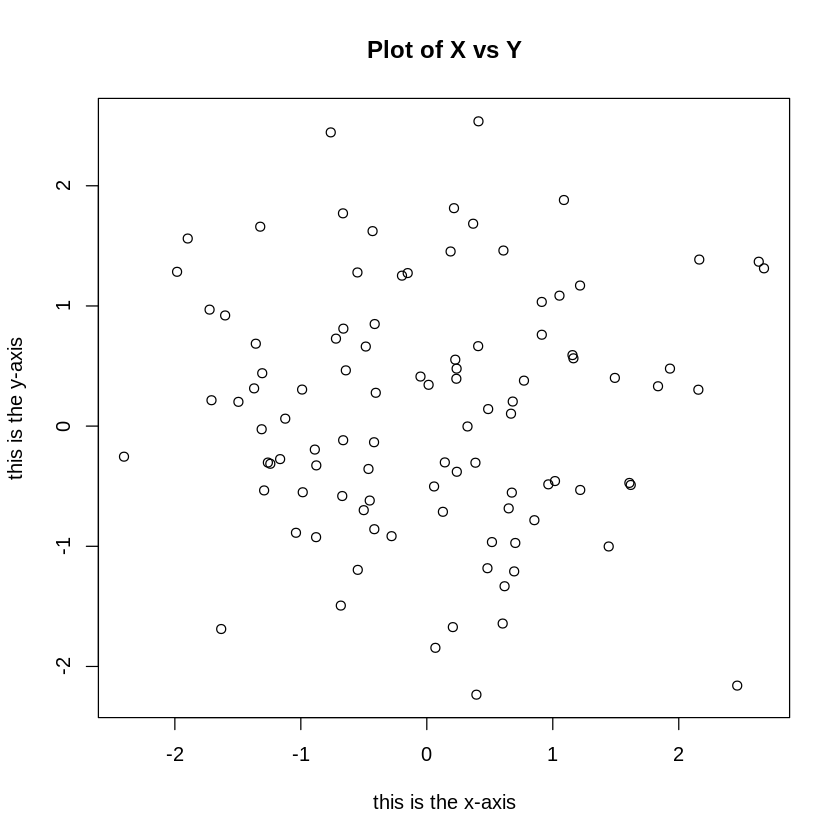

In [ ]:
x <- rnorm(100)
y <- rnorm(100)
plot(x, y, xlab = "this is the x-axis",
  ylab = "this is the y-axis",
  main = "Plot of X vs Y")

#### グラフを保存する

`pdf`関数や`jpeg`関数が使える

In [ ]:
# 描画されるファイルを開く
png("Figure.png")
# ファイルに書き込む
plot(x, y, col = "orange")
# ファイルを閉じる
dev.off()

png 
  2

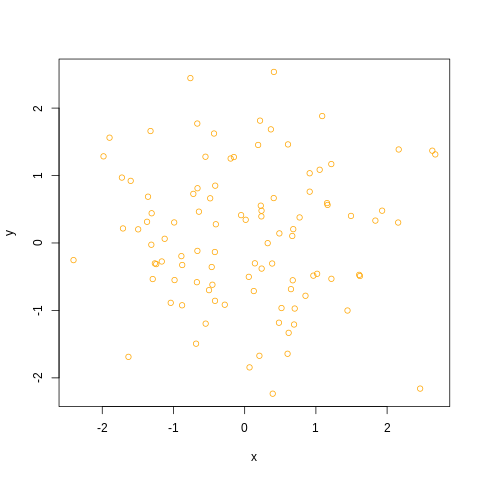

In [ ]:
IRdisplay::display_png(file = "Figure.png")

#### 等高線グラフの作成

`contour`関数を使う

引数にはグラフには
* x軸のvector
* y軸のvector
* z軸のmartix

が必要

`outer`関数は直積を計算する。第3引数に関数を指定すると、適用される関数を積から変更することができる

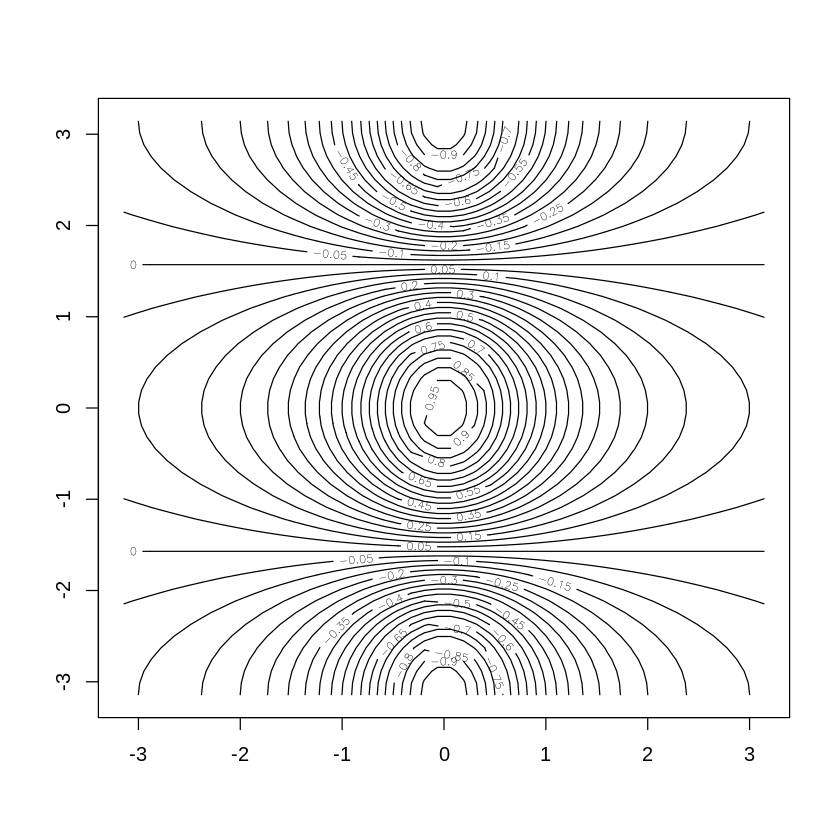

In [ ]:
fun <- function(x, y){
  return (cos(y) / (1 + x^2))
}

y <- x <- seq(-pi, pi, length = 50)
f <- outer(x, y, fun)
contour(x, y, f, nlevels = 45)

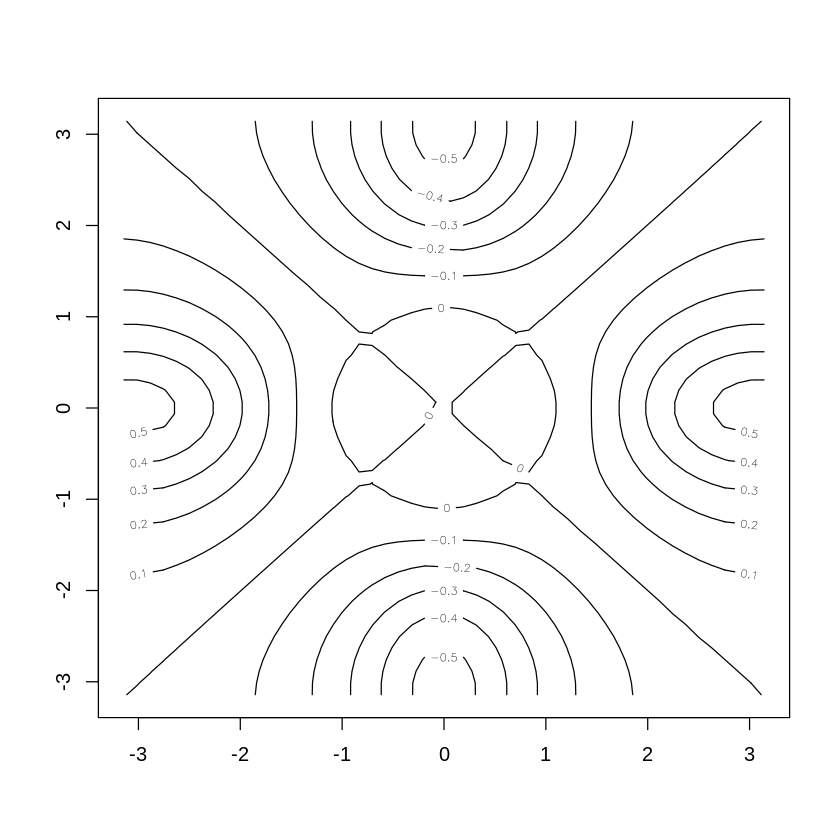

In [ ]:
# t()は行列の転置
fa <- (f - t(f)) / 2
contour(x, y, fa, nlevels = 15)

ヒートマップを作成する`image`や3dプロットをする`persp`もある

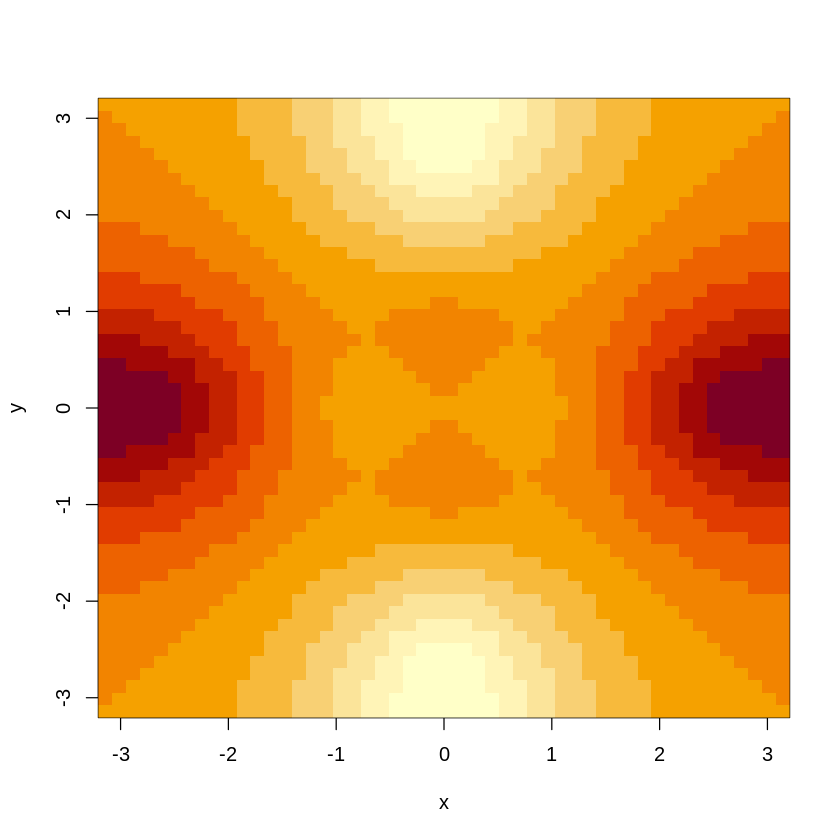

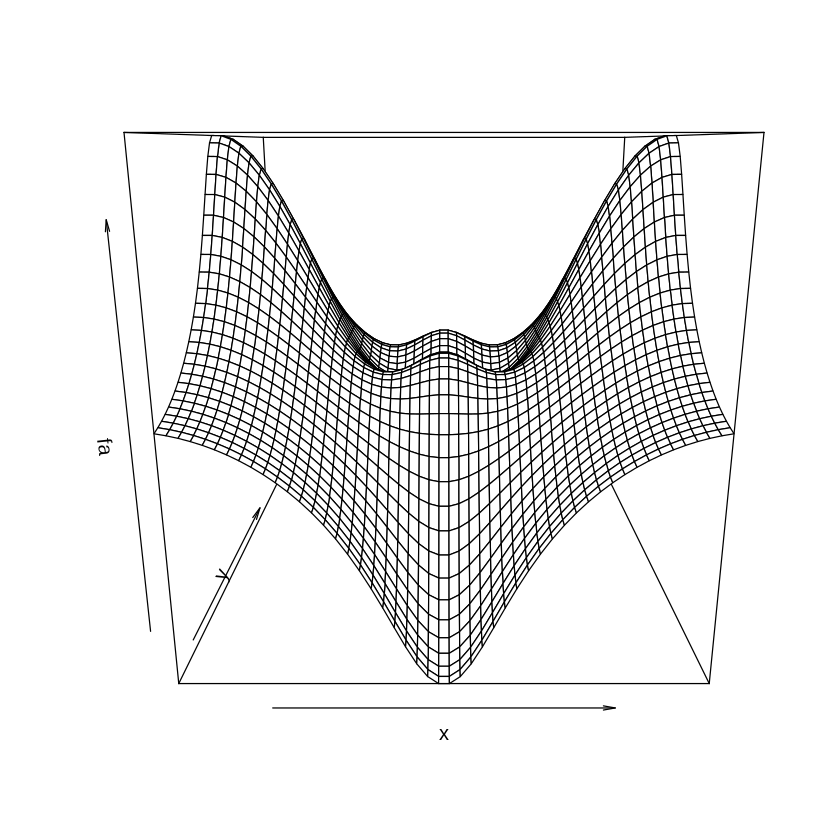

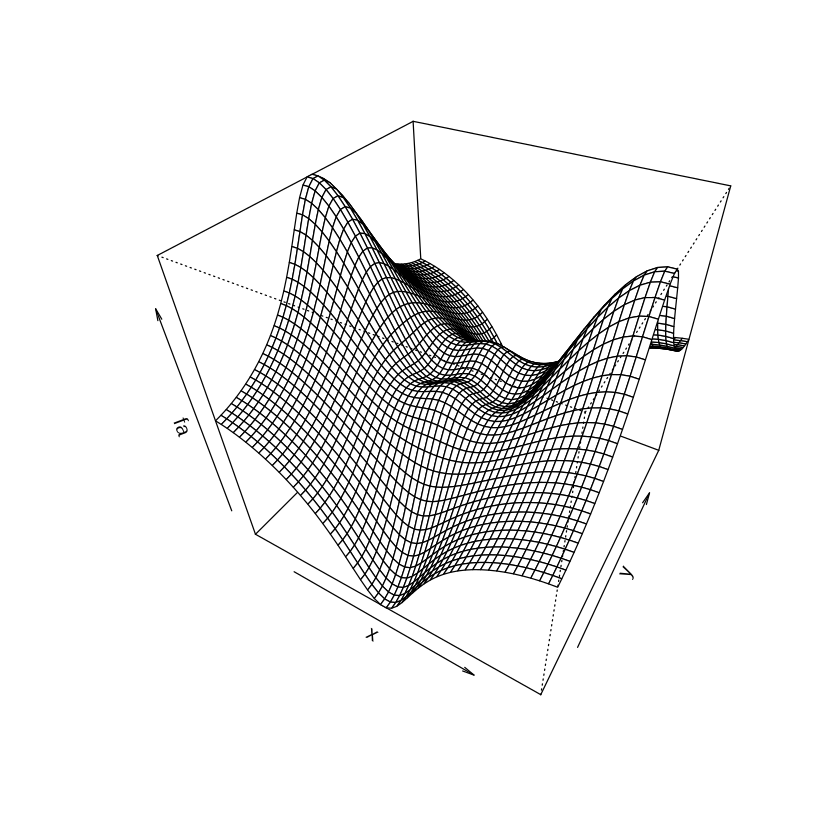

In [ ]:
image(x, y, fa)
persp(x, y, fa)
persp(x, y, fa, theta = 30, phi = 40)

### グラフ描画ライブラリの使用

標準の`plot`だと味気ない場合は`ggplot2`を使う事ができる

#### ggplot2

簡単に整ったグラフを表示できる

In [ ]:
# ライブラリのインストール
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
# ライブラリの読み込み
library(ggplot2)
library(reshape2)

ERROR: ignored

In [ ]:
# データの作成
d_norm <- data.frame(
  x = rnorm(100),
  y = rnorm(100)
)
contour_x <- seq(-pi, pi, length = 50)
contour_y <- contour_x
contour_f <- outer(contour_x, contour_y, function(a, b) cos(b) / (1 + a^2))
contour_fa <- (f - t(f)) / 2

colnames(contour_fa) <- contour_x
rownames(contour_fa) <- contour_y
d_fa <- melt(contour_fa)
colnames(d_fa) <- c("x", "y", "z")
head(d_fa)


,x,y,z
,<dbl>,<dbl>,<dbl>
1,-3.141593,-3.141593,0.000000000
2,-3.013364,-3.141593,-0.003979203
3,-2.885136,-3.141593,-0.009129591
4,-2.756908,-3.141593,-0.015497862
5,-2.628680,-3.141593,-0.023130959
6,-2.500451,-3.141593,-0.032079164


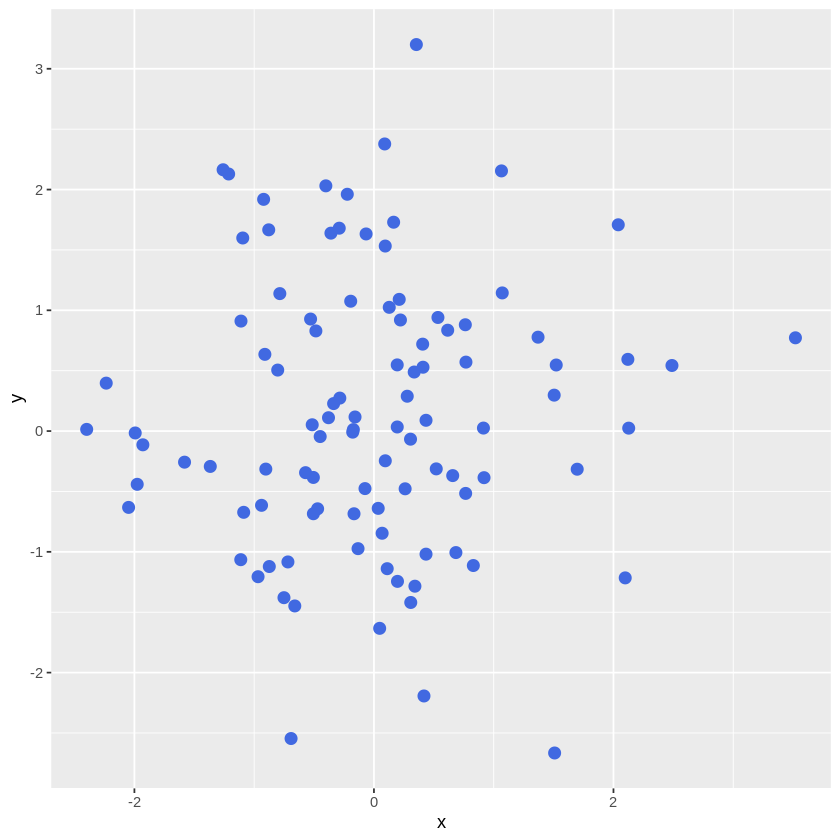

In [ ]:
# 散布図
# ggplot()で作成したグラフにgeom_point()で点を書き込むイメージ
g <- ggplot(d_norm, aes(x = x, y = y))
g <- g + geom_point(color = "royalblue", size = 3)
plot(g)

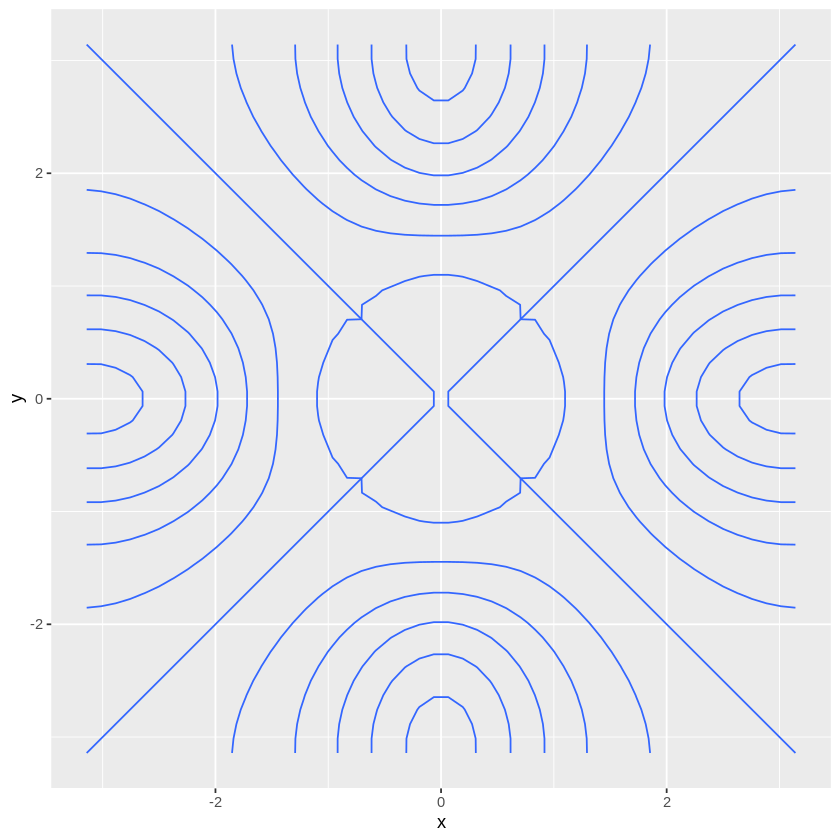

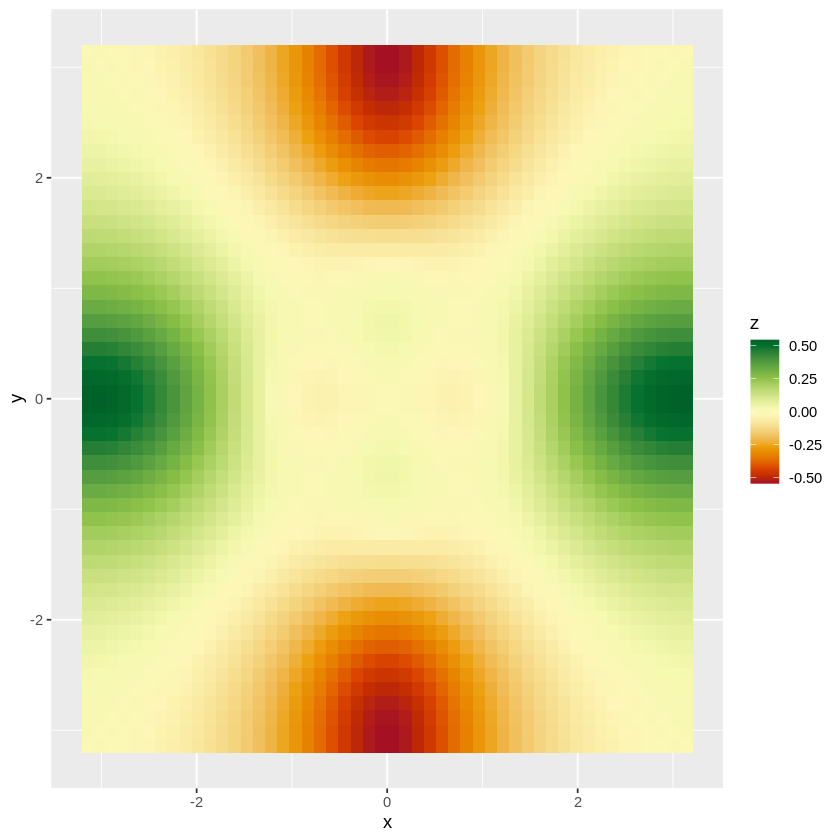

In [ ]:
# ヒートマップ・等高線
g <- ggplot(d_fa, aes(x = x, y = y))
g_cont <- g + geom_contour(aes(z = z))
g_heat <- g + geom_tile(aes(fill = z)) + 
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))
plot(g_cont)
plot(g_heat)